## Case study for the bike rental
## Ranjeet Bhosle
## Module : Linear Regression
## Date : 24-09-2024

In [1]:
# import all the required libraries
import numpy as py
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# import linear regression libraries
from sklearn.metrics import r2_score
#from statsmodels.formula.api import 
from sklearn.model_selection import train_test_split

In [2]:
# read the file
bike = pd.read_csv("day.csv")

In [3]:
#check the composition
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# describe the summary of the data
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [5]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
bike.shape

(730, 16)

<Axes: xlabel='casual', ylabel='cnt'>

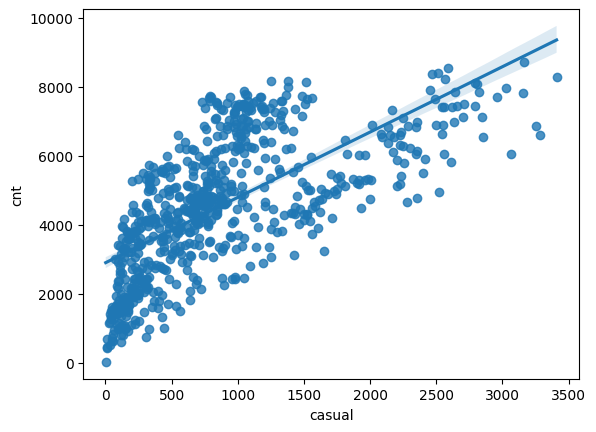

In [7]:
# print the current plots
sns.regplot(data=bike,y='cnt',x='casual')

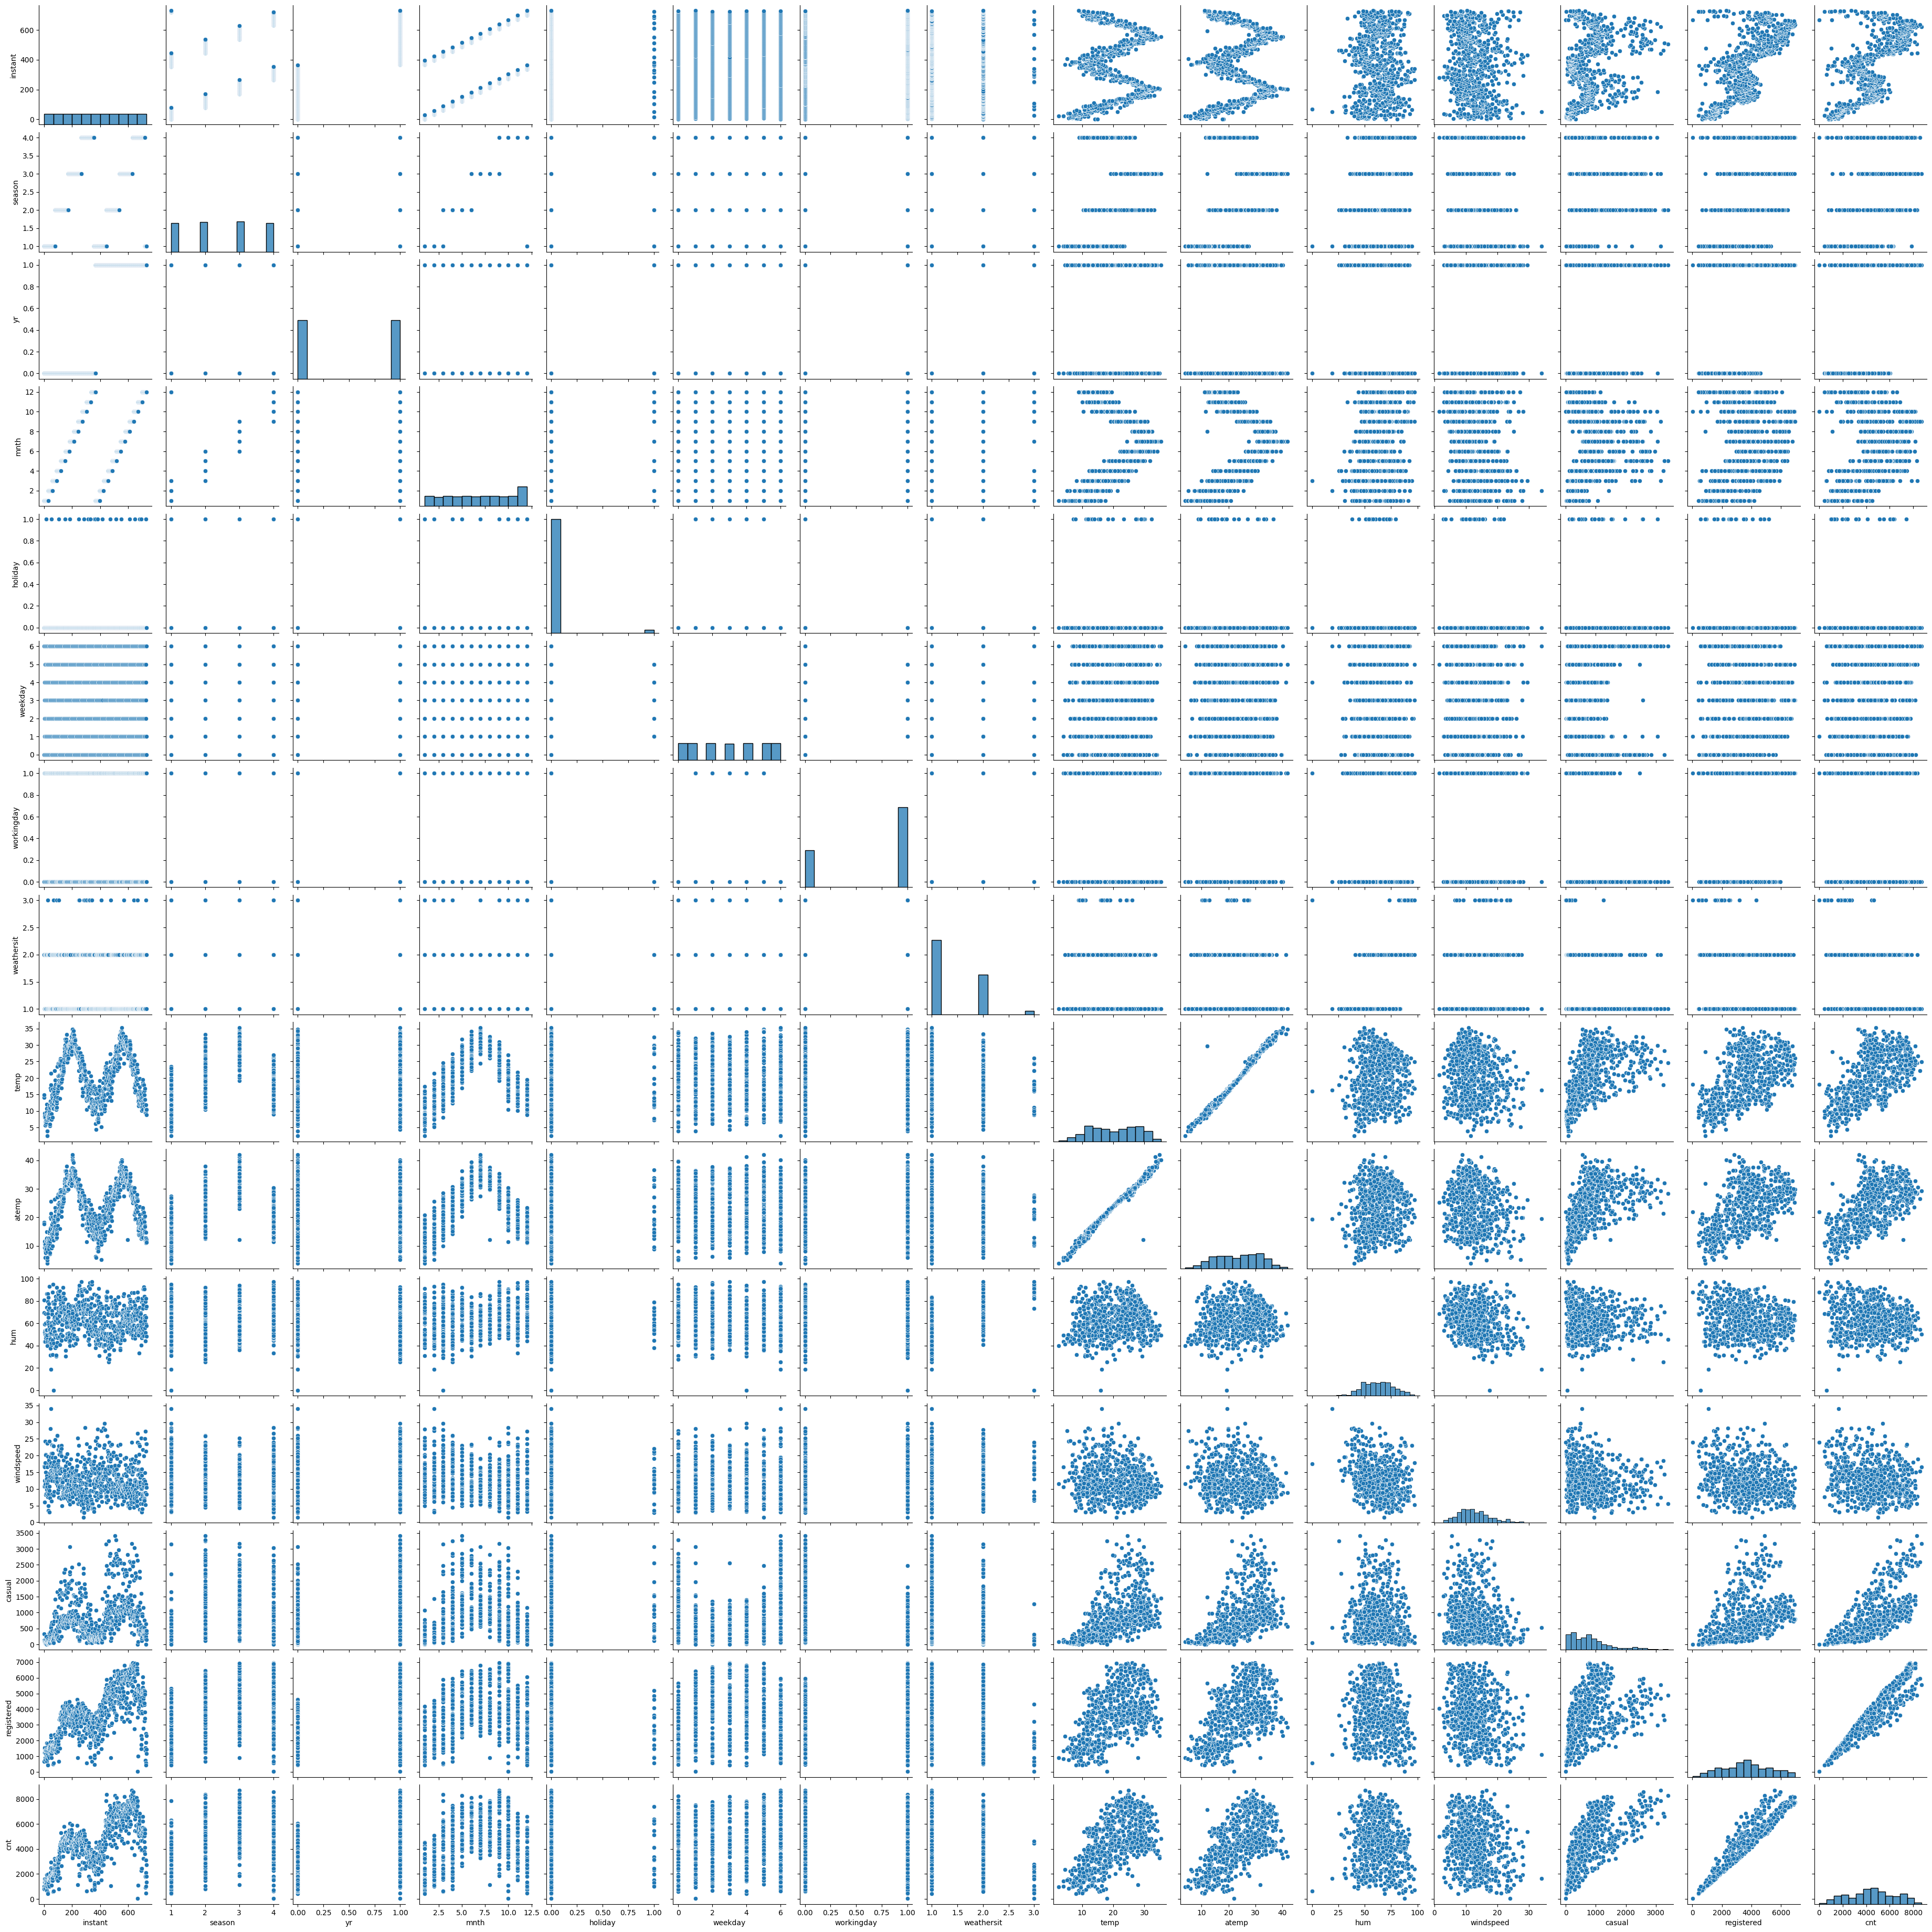

In [8]:

sns.pairplot(bike)
plt.show()
#sns.pairplot(data=bike,y_vars='cnt',x_vars=['casual','registered','weekday','weathersit','atemp','hum'])

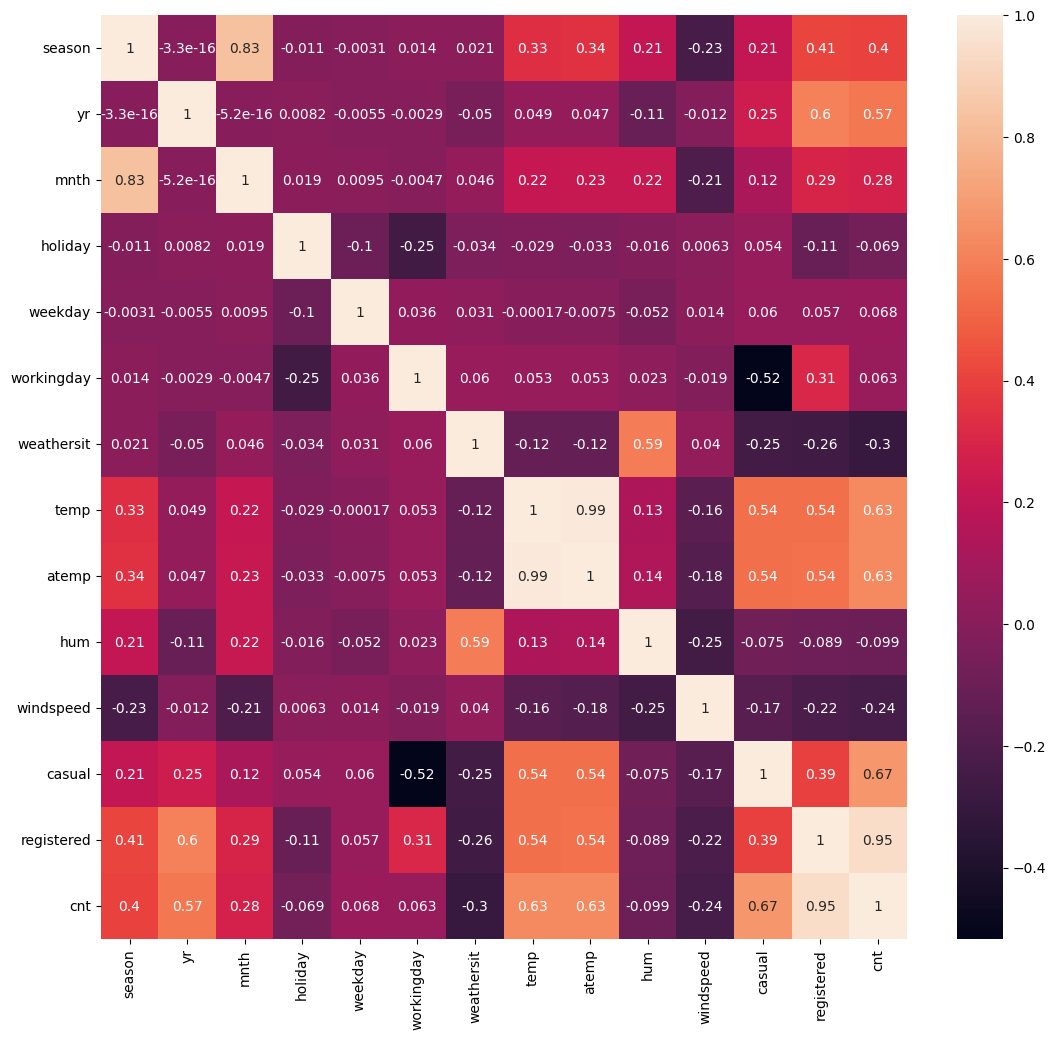

In [9]:
# print the heatmap
cols_to_drop = ['dteday','instant'] #,'cnt']

bike_wo_dt = bike.drop(cols_to_drop,axis=1)
plt.figure(figsize=(13,12))
sns.heatmap(bike_wo_dt.corr(),annot=True)
plt.show()

# clearly the high correlation fields are year, registered,casual, season,month, atemp

<Axes: xlabel='weekday', ylabel='cnt'>

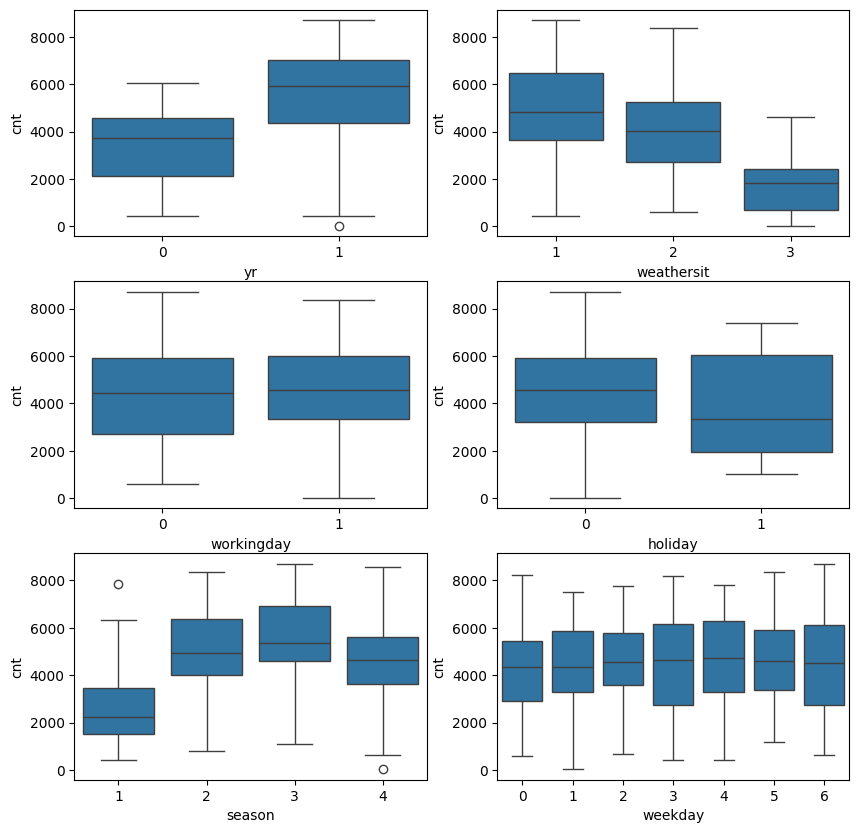

In [10]:
# print the boxplots for categorical variables
# cat_cols = 'yr','weathersit','workingday','holiday','season'
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.boxplot(data=bike,x='yr',y='cnt')

plt.subplot(3,2,2)
sns.boxplot(data=bike,x='weathersit',y='cnt')

plt.subplot(3,2,3)
sns.boxplot(data=bike,x='workingday',y='cnt')

plt.subplot(3,2,4)
sns.boxplot(data=bike,x='holiday',y='cnt')

plt.subplot(3,2,5)
sns.boxplot(data=bike,x='season',y='cnt')

plt.subplot(3,2,6)
sns.boxplot(data=bike,x='weekday',y='cnt')

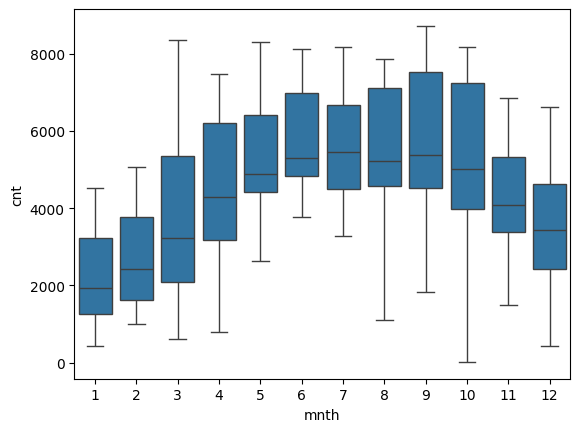

In [11]:
sns.boxplot(data=bike,x='mnth',y='cnt')
plt.show()


In [12]:
# define the categorical columns
cat_cols = ['yr','weathersit','workingday','holiday','season']

In [13]:
bike['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [14]:
bike['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [15]:
# the following variables have more than 2 categorical values
# season, weathersit, weekday
# of which season and weathersit can be applied with dummy vars logic

season_dm = pd.get_dummies(bike['season'], prefix="season", drop_first=True)
# Convert to 1s and 0s
season_dm = season_dm.astype(int) 
season_dm.value_counts()

season_2  season_3  season_4
0         1         0           188
1         0         0           184
0         0         0           180
                    1           178
Name: count, dtype: int64

In [16]:
#convert weather into dummyvars
weather_dm = pd.get_dummies(bike['weathersit'],prefix='weather',drop_first=True)
# Convert to 1s and 0s
weather_dm = weather_dm.astype(int) 
weather_dm.value_counts()

weather_2  weather_3
0          0            463
1          0            246
0          1             21
Name: count, dtype: int64

In [17]:
#convert weekday into dummyvars
weekday_dm = pd.get_dummies(bike['weekday'],prefix='weekday',drop_first=True)
# Convert to 1s and 0s
weekday_dm = weekday_dm.astype(int) 
weekday_dm.value_counts()

weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6
0          0          0          0          0          0            105
                                                       1            105
1          0          0          0          0          0            105
0          0          0          0          1          0            104
                                 1          0          0            104
           1          0          0          0          0            104
           0          1          0          0          0            103
Name: count, dtype: int64

In [18]:
#convert month into dummyvars
month_dm = pd.get_dummies(bike['mnth'],prefix='month',drop_first=True)
# Convert to 1s and 0s
month_dm = month_dm.astype(int) 
month_dm.value_counts()

month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  month_10  month_11  month_12
0        0        0        0        0        0        0        0        0         0         0           62
                                                                                            1           62
                                                                        1         0         0           62
                                                      1        0        0         0         0           62
         1        0        0        0        0        0        0        0         0         0           62
         0        0        0        0        1        0        0        0         0         0           62
                           1        0        0        0        0        0         0         0           62
                           0        0        0        0        0        0         1         0           60
                                    1      

In [19]:
#concat the dummy ds of season_dm, weekday_dm, month_dm and weather_dm into bike

bike = pd.concat([bike,season_dm,month_dm, weekday_dm,weather_dm],axis=1)
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp  ...  month_11  month_12  weekday_1  weekday_2  \
0           2  14.110847  ...         0         0          0          0   
1           2  14.902598  ...         0         0          0          0   
2           1   8.050924  ...         0         0          1          0   
3           1   8.200000  ...         0         0          0          1   
4           1   9.305237  ...         0         0          0          0   

   weekday_3  weekday_4  weekday_5  weekday_6  weather_2  weather_3  
0          0          0          0          1          1          0  
1          0          0          0          0          1          0  
2          0          0          0          0          0          0  
3          0          0          0          0          0          0  
4          1          0          0          0          0          0  

[5 rows x 38 columns]

In [20]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_2', 'season_3', 'season_4',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weather_2', 'weather_3'],
      dtype='object')

In [21]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp  ...  month_11  month_12  weekday_1  weekday_2  \
0           2  14.110847  ...         0         0          0          0   
1           2  14.902598  ...         0         0          0          0   
2           1   8.050924  ...         0         0          1          0   
3           1   8.200000  ...         0         0          0          1   
4           1   9.305237  ...         0         0          0          0   

   weekday_3  weekday_4  weekday_5  weekday_6  weather_2  weather_3  
0          0          0          0          1          1          0  
1          0          0          0          0          1          0  
2          0          0          0          0          0          0  
3          0          0          0          0          0          0  
4          1          0          0          0          0          0  

[5 rows x 38 columns]

In [22]:
# drop season, weekday, mnth and weathersit now that we have created the dummy_vars

drop_cols = ['weathersit','season', 'weekday','mnth']
#drop_cols = ['weathersit','season']
#drop_cols = ['weekday','mnth']
bike = bike.drop(drop_cols,axis=1)
bike.head()

instant      dteday  yr  holiday  workingday       temp     atemp      hum  \
0        1  01-01-2018   0        0           0  14.110847  18.18125  80.5833   
1        2  02-01-2018   0        0           0  14.902598  17.68695  69.6087   
2        3  03-01-2018   0        0           1   8.050924   9.47025  43.7273   
3        4  04-01-2018   0        0           1   8.200000  10.60610  59.0435   
4        5  05-01-2018   0        0           1   9.305237  11.46350  43.6957   

   windspeed  casual  ...  month_11  month_12  weekday_1  weekday_2  \
0  10.749882     331  ...         0         0          0          0   
1  16.652113     131  ...         0         0          0          0   
2  16.636703     120  ...         0         0          1          0   
3  10.739832     108  ...         0         0          0          1   
4  12.522300      82  ...         0         0          0          0   

   weekday_3  weekday_4  weekday_5  weekday_6  weather_2  weather_3  
0          0          0          0          1          1          0  
1          0          0          0          0          1          0  
2          0          0          0          0          0          0  
3          0          0          0          0          0          0  
4          1          0          0          0          0          0  

[5 rows x 34 columns]

In [23]:
bike = bike.drop('dteday',axis=1)
bike = bike.drop('instant',axis=1)

In [24]:
bike.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882     331   
1   0        0           0  14.902598  17.68695  69.6087  16.652113     131   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     120   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     108   
4   0        0           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  ...  month_11  month_12  weekday_1  weekday_2  weekday_3  \
0         654   985  ...         0         0          0          0          0   
1         670   801  ...         0         0          0          0          0   
2        1229  1349  ...         0         0          1          0          0   
3        1454  1562  ...         0         0          0          1          0   
4        1518  1600  ...         0         0          0          0          1   

   weekday_4  weekday_5  weekday_6  weather_2  weather_3  
0          0          0          1          1          0  
1          0          0          0          1          0  
2          0          0          0          0          0  
3          0          0          0          0          0  
4          0          0          0          0          0  

[5 rows x 32 columns]

In [25]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_2', 'season_3', 'season_4',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weather_2', 'weather_3'],
      dtype='object')

In [33]:
# Drop casual and registered as these are already cumulative in cnt
bike = bike.drop("casual", axis=1)
bike = bike.drop("registered", axis=1)

In [34]:
bike.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_2  season_3  ...  month_11  month_12  weekday_1  weekday_2  \
0         0         0  ...         0         0          0          0   
1         0         0  ...         0         0          0          0   
2         0         0  ...         0         0          1          0   
3         0         0  ...         0         0          0          1   
4         0         0  ...         0         0          0          0   

   weekday_3  weekday_4  weekday_5  weekday_6  weather_2  weather_3  
0          0          0          0          1          1          0  
1          0          0          0          0          1          0  
2          0          0          0          0          0          0  
3          0          0          0          0          0          0  
4          1          0          0          0          0          0  

[5 rows x 30 columns]

In [35]:
# split into training and test data

df_train,df_test = train_test_split(bike,train_size=0.7,random_state=100)

In [36]:
# print the training dateset
df_train.head()

yr  holiday  workingday       temp    atemp      hum  windspeed   cnt  \
576   1        0           1  29.246653  33.1448  70.4167  11.083475  7216   
426   1        0           0  16.980847  20.6746  62.1250  10.792293  4066   
728   1        0           0  10.489153  11.5850  48.3333  23.500518  1796   
482   1        0           0  15.443347  18.8752  48.9583   8.708325  4220   
111   0        0           1  13.803347  16.0977  72.9583  14.707907  1683   

     season_2  season_3  ...  month_11  month_12  weekday_1  weekday_2  \
576         0         1  ...         0         0          0          1   
426         0         0  ...         0         0          0          0   
728         0         0  ...         0         1          0          0   
482         1         0  ...         0         0          0          0   
111         1         0  ...         0         0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weather_2  weather_3  
576          0          0          0          0          0          0  
426          0          0          0          1          1          0  
728          0          0          0          0          0          0  
482          0          0          0          1          1          0  
111          0          0          1          0          1          0  

[5 rows x 30 columns]

In [30]:
# print the test dateset
df_test.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
184   0        1           0  29.793347  33.27085  63.7917   5.459106    3065   
535   1        0           1  32.082500  36.04875  59.2083   7.625404     872   
299   0        0           1  19.270000  22.85230  81.2917  13.250121     240   
221   0        0           1  31.433347  34.24915  42.4167  13.417286     884   
152   0        0           1  29.315000  32.19710  30.5000  19.583229     736   

     registered   cnt  ...  month_11  month_12  weekday_1  weekday_2  \
184        2978  6043  ...         0         0          1          0   
535        5339  6211  ...         0         0          0          0   
299        2419  2659  ...         0         0          0          0   
221        3896  4780  ...         0         0          0          0   
152        4232  4968  ...         0         0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weather_2  weather_3  
184          0          0          0          0          1          0  
535          1          0          0          0          0          0  
299          0          1          0          0          1          0  
221          1          0          0          0          0          0  
152          0          1          0          0          0          0  

[5 rows x 32 columns]

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


num_vars =['temp','atemp','hum','windspeed','cnt']

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt  season_2  season_3  ...  month_11  month_12  weekday_1  \
576  0.827658         0         1  ...         0         0          0   
426  0.465255         0         0  ...         0         0          0   
728  0.204096         0         0  ...         0         1          0   
482  0.482973         1         0  ...         0         0          0   
111  0.191095         1         0  ...         0         0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weather_2  \
576          1          0          0          0          0          0   
426          0          0          0          0          1          1   
728          0          0          0          0          0          0   
482          0          0          0          0          1          1   
111          0          0          0          1          0          1   

     weather_3  
576          0  
426          0  
728          0  
482          0  
111          0  

[5 rows x 30 columns]

<Axes: >

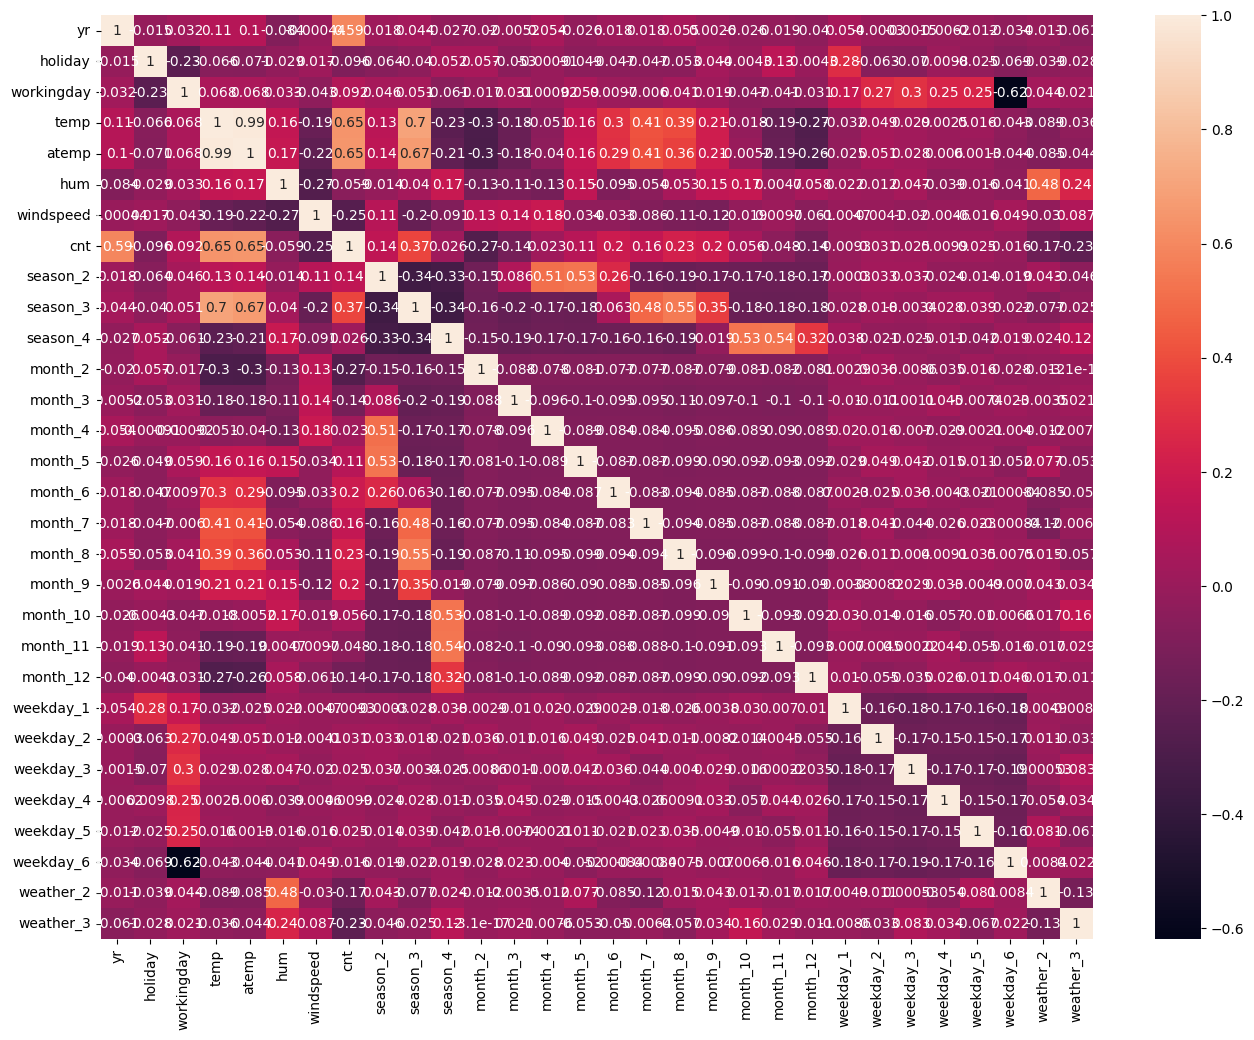

In [39]:
plt.figure(figsize=(16,12))
sns.heatmap(df_train.corr(),annot=True)

Follow the approach of building the model with all variables

In [40]:
import statsmodels.api as sm
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [41]:
# df_test is not scaled yet.
df_test.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
184   0        1           0  29.793347  33.27085  63.7917   5.459106  6043   
535   1        0           1  32.082500  36.04875  59.2083   7.625404  6211   
299   0        0           1  19.270000  22.85230  81.2917  13.250121  2659   
221   0        0           1  31.433347  34.24915  42.4167  13.417286  4780   
152   0        0           1  29.315000  32.19710  30.5000  19.583229  4968   

     season_2  season_3  ...  month_11  month_12  weekday_1  weekday_2  \
184         0         1  ...         0         0          1          0   
535         1         0  ...         0         0          0          0   
299         0         0  ...         0         0          0          0   
221         0         1  ...         0         0          0          0   
152         1         0  ...         0         0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weather_2  weather_3  
184          0          0          0          0          1          0  
535          1          0          0          0          0          0  
299          0          1          0          0          1          0  
221          1          0          0          0          0          0  
152          0          1          0          0          0          0  

[5 rows x 30 columns]

In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          220 non-null    int64  
 1   holiday     220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   temp        220 non-null    float64
 4   atemp       220 non-null    float64
 5   hum         220 non-null    float64
 6   windspeed   220 non-null    float64
 7   cnt         220 non-null    int64  
 8   season_2    220 non-null    int64  
 9   season_3    220 non-null    int64  
 10  season_4    220 non-null    int64  
 11  month_2     220 non-null    int64  
 12  month_3     220 non-null    int64  
 13  month_4     220 non-null    int64  
 14  month_5     220 non-null    int64  
 15  month_6     220 non-null    int64  
 16  month_7     220 non-null    int64  
 17  month_8     220 non-null    int64  
 18  month_9     220 non-null    int64  
 19  month_10    220 non-null    int6

In [43]:
# get the train dataset split into response variable(y_train) and predictor variables (X_train)
y_train=df_train.pop('cnt')
X_train=df_train


In [44]:
# print total count (cnt) details of y
y_train



576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [45]:
# x train data set is without cnt variable
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

     season_2  season_3  season_4  ...  month_11  month_12  weekday_1  \
576         0         1         0  ...         0         0          0   
426         0         0         0  ...         0         0          0   
728         0         0         0  ...         0         1          0   
482         1         0         0  ...         0         0          0   
111         1         0         0  ...         0         0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weather_2  \
576          1          0          0          0          0          0   
426          0          0          0          0          1          1   
728          0          0          0          0          0          0   
482          0          0          0          0          1          1   
111          0          0          0          1          0          1   

     weather_3  
576          0  
426          0  
728          0  
482          0  
111          0  

[5 rows x 29 columns]

Automated technique using RFE

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# create linear regression object
# fit into the model
# use RFE to get the selective set of fields
# fit into RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE to get 15 fields only
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.False_, np.int64(6)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_2', np.True_, np.int64(1)),
 ('season_3', np.False_, np.int64(4)),
 ('season_4', np.True_, np.int64(1)),
 ('month_2', np.False_, np.int64(12)),
 ('month_3', np.False_, np.int64(13)),
 ('month_4', np.False_, np.int64(14)),
 ('month_5', np.False_, np.int64(15)),
 ('month_6', np.False_, np.int64(8)),
 ('month_7', np.False_, np.int64(5)),
 ('month_8', np.False_, np.int64(11)),
 ('month_9', np.True_, np.int64(1)),
 ('month_10', np.False_, np.int64(7)),
 ('month_11', np.False_, np.int64(9)),
 ('month_12', np.False_, np.int64(10)),
 ('weekday_1', np.True_, np.int64(1)),
 ('weekday_2', np.True_, np.int64(1)),
 ('weekday_3', np.True_, np.int64(1)),
 ('weekday_4', np.True_, np.int64(1)),
 ('weekday_5', np.True_, np.int64(1)),
 ('weekday_6'

In [49]:
# mentions the fields that are  considered in the model
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'month_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weather_3'],
      dtype='object')

In [50]:
# mentions the fields that are not considered in the model
X_train.columns[~rfe.support_]

Index(['atemp', 'season_3', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_10', 'month_11', 'month_12',
       'weekday_6', 'weather_2'],
      dtype='object')

Build model using RFE

In [51]:
# Creating X_train_rfe dataframe from the  RFE columns
X_train_rfe = X_train[col]

In [52]:
X_train_rfe

yr  holiday  workingday      temp       hum  windspeed  season_2  \
576   1        0           1  0.815169  0.725633   0.264686         0   
426   1        0           0  0.442393  0.640189   0.255342         0   
728   1        0           0  0.245101  0.498067   0.663106         0   
482   1        0           0  0.395666  0.504508   0.188475         1   
111   0        0           1  0.345824  0.751824   0.380981         1   
..   ..      ...         ...       ...       ...        ...       ...   
578   1        0           1  0.863973  0.679690   0.187140         0   
53    0        0           1  0.202618  0.435939   0.111379         0   
350   0        0           0  0.248216  0.577930   0.431816         0   
79    0        0           1  0.462664  0.759870   0.529881         1   
520   1        0           1  0.600225  0.632030   0.359599         1   

     season_4  month_9  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
576         0        0          0          1          0          0          0   
426         0        0          0          0          0          0          0   
728         0        0          0          0          0          0          0   
482         0        0          0          0          0          0          0   
111         0        0          0          0          0          0          1   
..        ...      ...        ...        ...        ...        ...        ...   
578         0        0          0          0          0          1          0   
53          0        0          0          0          1          0          0   
350         1        0          0          0          0          0          0   
79          0        0          1          0          0          0          0   
520         0        0          0          1          0          0          0   

     weather_3  
576          0  
426          0  
728          0  
482          0  
111          0  
..         ...  
578          0  
53           0  
350          0  
79           0  
520          0  

[510 rows x 15 columns]

In [54]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'month_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weather_3'],
      dtype='object')

In [63]:
X_train_rfe.value_counts()

yr  holiday  workingday  temp      hum       windspeed  season_2  season_4  month_9  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weather_3
1   1        0           0.807900  0.814941  0.233935   0         0         1        1          0          0          0          0          0            1
0   0        0           0.000000  0.412194  0.278756   0         0         0        0          0          0          0          0          0            1
                         0.098690  0.447403  0.687176   0         0         0        0          0          0          0          0          0            1
                         0.131919  0.552168  0.482630   0         0         0        0          0          0          0          0          0            1
                         0.171197  0.671607  0.221560   0         0         0        0          0          0          0          0          0            1
                                                                           

In [57]:
X_train_rfe.values

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [60]:
X_train_rfe.shape[1]

15

In [69]:
#check the VIF values for the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



c:\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Features    VIF
1      holiday    inf
2   workingday    inf
13   weekday_5    inf
11   weekday_3    inf
12   weekday_4    inf
9    weekday_1    inf
10   weekday_2    inf
4          hum  10.96
3         temp   7.20
5    windspeed   3.59
0           yr   2.03
7     season_4   1.64
6     season_2   1.59
8      month_9   1.21
14   weather_3   1.10

In [70]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_model1 = sm.add_constant(X_train_rfe)

# calculate OLS
lr1 = sm.OLS(y_train,X_train_model1).fit()


In [71]:
# print the X_train_model1 with a constant
X_train_model1

const  yr  holiday  workingday      temp       hum  windspeed  season_2  \
576    1.0   1        0           1  0.815169  0.725633   0.264686         0   
426    1.0   1        0           0  0.442393  0.640189   0.255342         0   
728    1.0   1        0           0  0.245101  0.498067   0.663106         0   
482    1.0   1        0           0  0.395666  0.504508   0.188475         1   
111    1.0   0        0           1  0.345824  0.751824   0.380981         1   
..     ...  ..      ...         ...       ...       ...        ...       ...   
578    1.0   1        0           1  0.863973  0.679690   0.187140         0   
53     1.0   0        0           1  0.202618  0.435939   0.111379         0   
350    1.0   0        0           0  0.248216  0.577930   0.431816         0   
79     1.0   0        0           1  0.462664  0.759870   0.529881         1   
520    1.0   1        0           1  0.600225  0.632030   0.359599         1   

     season_4  month_9  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
576         0        0          0          1          0          0          0   
426         0        0          0          0          0          0          0   
728         0        0          0          0          0          0          0   
482         0        0          0          0          0          0          0   
111         0        0          0          0          0          0          1   
..        ...      ...        ...        ...        ...        ...        ...   
578         0        0          0          0          0          1          0   
53          0        0          0          0          1          0          0   
350         1        0          0          0          0          0          0   
79          0        0          1          0          0          0          0   
520         0        0          0          1          0          0          0   

     weather_3  
576          0  
426          0  
728          0  
482          0  
111          0  
..         ...  
578          0  
53           0  
350          0  
79           0  
520          0  

[510 rows x 16 columns]

In [72]:
X_train_model1.shape

(510, 16)

In [74]:
# check the parameters

lr1.params

const         0.257232
yr            0.226910
holiday      -0.067386
workingday    0.023389
temp          0.592082
hum          -0.277927
windspeed    -0.201410
season_2      0.089142
season_4      0.144621
month_9       0.104226
weekday_1    -0.017033
weekday_2    -0.015780
weekday_3    -0.003346
weekday_4    -0.006005
weekday_5    -0.001833
weather_3    -0.196715
dtype: float64

In [75]:
#Let's see the summary of our linear model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          4.91e-181
Time:                        21:03:38   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2572      0.027      9.543      0.0

In [76]:
# drop hum column as it has a high VIF of 10.96
X_train_new = X_train_rfe.drop(["hum"],axis=1)

In [77]:
# Check for the VIF values of the new variables now
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

c:\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Features   VIF
1      holiday   inf
2   workingday   inf
10   weekday_3   inf
11   weekday_4   inf
8    weekday_1   inf
9    weekday_2   inf
12   weekday_5   inf
3         temp  4.29
4    windspeed  3.16
0           yr  2.02
5     season_2  1.56
6     season_4  1.37
7      month_9  1.20
13   weather_3  1.07

In [78]:
# Add a constant
X_train_model2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_model2).fit()



In [79]:
# check the params
lr2.params

const         0.077438
yr            0.233645
holiday      -0.062382
workingday    0.021759
temp          0.567597
windspeed    -0.143782
season_2      0.081394
season_4      0.127409
month_9       0.088421
weekday_1    -0.019309
weekday_2    -0.016249
weekday_3    -0.003790
weekday_4    -0.000156
weekday_5    -0.001119
weather_3    -0.255465
dtype: float64

In [80]:
# check the summary
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          8.14e-167
Time:                        21:41:01   Log-Likelihood:                 456.34
No. Observations:                 510   AIC:                            -884.7
Df Residuals:                     496   BIC:                            -825.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0774      0.019      4.145      0.000       0.041       0.114
yr             0.2336      0.009     26.041      0.000       0.216       0.251
holiday       -0.0624      0.026     -2.441      0.015      -0.113      -0.012
workingday     0.0218      0.009      2.538      0.011       0.005       0.039
temp           0.5676      0.021     26.498      0.000       0.526       0.610
windspeed     -0.1438      0.027     -5.268      0.000      -0.197      -0.090
season_2       0.0814      0.011      7.259      0.000       0.059       0.103
season_4       0.1274      0.011     11.268      0.000       0.105       0.150
month_9        0.0884      0.017      5.157      0.000       0.055       0.122
weekday_1     -0.0193      0.011     -1.800      0.072      -0.040       0.002
weekday_2     -0.0162      0.012     -1.319      0.188      -0.040       0.008
weekday_3     -0.0038      0.012     -0.328      0.743      -0.027       0.019
weekday_4     -0.0002      0.012     -0.013      0.990      -0.024       0.023
weekday_5     -0.0011      0.012     -0.091      0.928      -0.025       0.023
weather_3     -0.2555      0.027     -9.515      0.000      -0.308      -0.203
==============================================================================
Omnibus:                       60.399   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.471
Skew:                          -0.740   Prob(JB):                     3.40e-23
Kurtosis:                       4.637   Cond. No.                     7.86e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [81]:
# drop weekday4 as it has a high p value

X_train_new_2 = X_train_new.drop(["weekday_4"],axis=1)

In [82]:
# Check for the VIF values of the new variables now
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_2.values, i) for i in range(X_train_new_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2   workingday  6.95
3         temp  4.29
4    windspeed  3.16
8    weekday_1  2.21
10   weekday_3  2.20
0           yr  2.02
9    weekday_2  2.00
11   weekday_5  1.97
5     season_2  1.56
6     season_4  1.37
1      holiday  1.32
7      month_9  1.20
12   weather_3  1.07

In [83]:
# Add a constant
X_train_model22 = sm.add_constant(X_train_new_2)

# Create a first fitted model
lr22 = sm.OLS(y_train, X_train_model22).fit()

In [84]:
lr22.params

const         0.077438
yr            0.233645
holiday      -0.062538
workingday    0.021602
temp          0.567597
windspeed    -0.143782
season_2      0.081394
season_4      0.127409
month_9       0.088421
weekday_1    -0.019153
weekday_2    -0.016093
weekday_3    -0.003633
weekday_5    -0.000963
weather_3    -0.255465
dtype: float64

In [85]:
lr22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          8.14e-167
Time:                        21:50:33   Log-Likelihood:                 456.34
No. Observations:                 510   AIC:                            -884.7
Df Residuals:                     496   BIC:                            -825.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0774      0.019      4.145      0.000       0.041       0.114
yr             0.2336      0.009     26.041      0.000       0.216       0.251
holiday       -0.0625      0.032     -1.941      0.053      -0.126       0.001
workingday     0.0216      0.015      1.471      0.142      -0.007       0.050
temp           0.5676      0.021     26.498      0.000       0.526       0.610
windspeed     -0.1438      0.027     -5.268      0.000      -0.197      -0.090
season_2       0.0814      0.011      7.259      0.000       0.059       0.103
season_4       0.1274      0.011     11.268      0.000       0.105       0.150
month_9        0.0884      0.017      5.157      0.000       0.055       0.122
weekday_1     -0.0192      0.017     -1.127      0.260      -0.053       0.014
weekday_2     -0.0161      0.017     -0.929      0.353      -0.050       0.018
weekday_3     -0.0036      0.017     -0.220      0.826      -0.036       0.029
weekday_5     -0.0010      0.017     -0.055      0.956      -0.035       0.033
weather_3     -0.2555      0.027     -9.515      0.000      -0.308      -0.203
==============================================================================
Omnibus:                       60.399   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.471
Skew:                          -0.740   Prob(JB):                     3.40e-23
Kurtosis:                       4.637   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# drop working day as it has high VIF and high P value
X_train_new_3 = X_train_new_2.drop(["workingday"],axis=1)

In [87]:
# Check for the VIF values of the new variables now
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_3.values, i) for i in range(X_train_new_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2        temp  4.03
3   windspeed  3.07
0          yr  2.02
4    season_2  1.56
7   weekday_1  1.41
5    season_4  1.36
9   weekday_3  1.33
8   weekday_2  1.28
10  weekday_5  1.26
6     month_9  1.20
1     holiday  1.13
11  weather_3  1.07

In [88]:
# Add a constant
X_train_model3 = sm.add_constant(X_train_new_3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_model3).fit()

In [89]:
lr3.params

const        0.084240
yr           0.233780
holiday     -0.081495
temp         0.567868
windspeed   -0.144672
season_2     0.081292
season_4     0.126839
month_9      0.089164
weekday_1   -0.004540
weekday_2   -0.001153
weekday_3    0.011214
weekday_5    0.013942
weather_3   -0.253917
dtype: float64

In [90]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     170.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          1.78e-167
Time:                        21:53:05   Log-Likelihood:                 455.23
No. Observations:                 510   AIC:                            -884.5
Df Residuals:                     497   BIC:                            -829.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0842      0.018      4.649      0.000       0.049       0.120
yr             0.2338      0.009     26.027      0.000       0.216       0.251
holiday       -0.0815      0.030     -2.756      0.006      -0.140      -0.023
temp           0.5679      0.021     26.481      0.000       0.526       0.610
windspeed     -0.1447      0.027     -5.296      0.000      -0.198      -0.091
season_2       0.0813      0.011      7.241      0.000       0.059       0.103
season_4       0.1268      0.011     11.211      0.000       0.105       0.149
month_9        0.0892      0.017      5.196      0.000       0.055       0.123
weekday_1     -0.0045      0.014     -0.329      0.742      -0.032       0.023
weekday_2     -0.0012      0.014     -0.082      0.935      -0.029       0.026
weekday_3      0.0112      0.013      0.855      0.393      -0.015       0.037
weekday_5      0.0139      0.014      0.981      0.327      -0.014       0.042
weather_3     -0.2539      0.027     -9.453      0.000      -0.307      -0.201
==============================================================================
Omnibus:                       61.869   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.223
Skew:                          -0.762   Prob(JB):                     2.34e-23
Kurtosis:                       4.607   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# drop weekday_2 as it has high P value
X_train_new_4 = X_train_new_3.drop(["weekday_2"],axis=1)

In [92]:
# Check for the VIF values of the new variables now
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_4.values, i) for i in range(X_train_new_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2        temp  3.84
3   windspeed  3.03
0          yr  2.01
4    season_2  1.56
5    season_4  1.35
7   weekday_1  1.35
8   weekday_3  1.26
9   weekday_5  1.20
6     month_9  1.20
1     holiday  1.13
10  weather_3  1.07

In [93]:
# Add a constant
X_train_model4 = sm.add_constant(X_train_new_4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_model4).fit()

In [94]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     186.4
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          1.28e-168
Time:                        21:56:14   Log-Likelihood:                 455.23
No. Observations:                 510   AIC:                            -886.5
Df Residuals:                     498   BIC:                            -835.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0840      0.018      4.697      0.000       0.049       0.119
yr             0.2338      0.009     26.053      0.000       0.216       0.251
holiday       -0.0815      0.030     -2.758      0.006      -0.139      -0.023
temp           0.5678      0.021     26.530      0.000       0.526       0.610
windspeed     -0.1447      0.027     -5.301      0.000      -0.198      -0.091
season_2       0.0813      0.011      7.249      0.000       0.059       0.103
season_4       0.1268      0.011     11.222      0.000       0.105       0.149
month_9        0.0892      0.017      5.202      0.000       0.055       0.123
weekday_1     -0.0043      0.013     -0.319      0.750      -0.031       0.022
weekday_3      0.0115      0.013      0.906      0.365      -0.013       0.036
weekday_5      0.0142      0.014      1.029      0.304      -0.013       0.041
weather_3     -0.2539      0.027     -9.464      0.000      -0.307      -0.201
==============================================================================
Omnibus:                       61.806   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.303
Skew:                          -0.760   Prob(JB):                     2.24e-23
Kurtosis:                       4.611   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# lets try dropping weekday_1 as it has high P value
X_train_new_5 = X_train_new_4.drop(["weekday_1"],axis=1)

In [96]:
# Check for the VIF values of the new variables now
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_5.values, i) for i in range(X_train_new_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2       temp  3.78
3  windspeed  3.01
0         yr  2.00
4   season_2  1.55
5   season_4  1.35
7  weekday_3  1.22
6    month_9  1.20
8  weekday_5  1.16
9  weather_3  1.07
1    holiday  1.04

In [97]:
# Add a constant
X_train_model5 = sm.add_constant(X_train_new_5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_model5).fit()

In [98]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     205.4
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          9.16e-170
Time:                        22:00:02   Log-Likelihood:                 455.18
No. Observations:                 510   AIC:                            -888.4
Df Residuals:                     499   BIC:                            -841.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0832      0.018      4.704      0.000       0.048       0.118
yr             0.2336      0.009     26.106      0.000       0.216       0.251
holiday       -0.0840      0.028     -2.957      0.003      -0.140      -0.028
temp           0.5679      0.021     26.561      0.000       0.526       0.610
windspeed     -0.1445      0.027     -5.299      0.000      -0.198      -0.091
season_2       0.0812      0.011      7.250      0.000       0.059       0.103
season_4       0.1268      0.011     11.229      0.000       0.105       0.149
month_9        0.0892      0.017      5.209      0.000       0.056       0.123
weekday_3      0.0123      0.012      0.992      0.321      -0.012       0.037
weekday_5      0.0151      0.014      1.112      0.267      -0.012       0.042
weather_3     -0.2539      0.027     -9.475      0.000      -0.307      -0.201
==============================================================================
Omnibus:                       61.523   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.386
Skew:                          -0.755   Prob(JB):                     2.15e-23
Kurtosis:                       4.622   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
lr5.params

const        0.083200
yr           0.233603
holiday     -0.084012
temp         0.567894
windspeed   -0.144456
season_2     0.081162
season_4     0.126786
month_9      0.089202
weekday_3    0.012308
weekday_5    0.015064
weather_3   -0.253924
dtype: float64

In [100]:
# lets try dropping weekday_3 as it has high P value
X_train_new_6 = X_train_new_5.drop(["weekday_3"],axis=1)

In [101]:
# Check for the VIF values of the new variables now
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_6.values, i) for i in range(X_train_new_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2       temp  3.70
3  windspeed  2.99
0         yr  2.00
4   season_2  1.55
5   season_4  1.34
6    month_9  1.20
7  weekday_5  1.14
8  weather_3  1.07
1    holiday  1.03

In [102]:
# Add a constant
X_train_model6 = sm.add_constant(X_train_new_6)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_model6).fit()

In [103]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.1
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          9.62e-171
Time:                        22:04:21   Log-Likelihood:                 454.67
No. Observations:                 510   AIC:                            -889.3
Df Residuals:                     500   BIC:                            -847.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0855      0.018      4.880      0.000       0.051       0.120
yr             0.2336      0.009     26.104      0.000       0.216       0.251
holiday       -0.0860      0.028     -3.034      0.003      -0.142      -0.030
temp           0.5681      0.021     26.570      0.000       0.526       0.610
windspeed     -0.1452      0.027     -5.330      0.000      -0.199      -0.092
season_2       0.0815      0.011      7.283      0.000       0.060       0.103
season_4       0.1265      0.011     11.208      0.000       0.104       0.149
month_9        0.0897      0.017      5.238      0.000       0.056       0.123
weekday_5      0.0129      0.013      0.962      0.336      -0.013       0.039
weather_3     -0.2519      0.027     -9.427      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       62.800   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.129
Skew:                          -0.767   Prob(JB):                     5.46e-24
Kurtosis:                       4.640   Cond. No.                         9.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# lets try dropping weekday_5 as it has high P value
X_train_new_7 = X_train_new_6.drop(["weekday_5"],axis=1)

In [105]:
# Check for the VIF values of the new variables now
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_7.values, i) for i in range(X_train_new_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2       temp  3.63
3  windspeed  2.97
0         yr  2.00
4   season_2  1.55
5   season_4  1.34
6    month_9  1.20
7  weather_3  1.06
1    holiday  1.03

In [106]:
# Add a constant
X_train_model7 = sm.add_constant(X_train_new_7)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_model7).fit()

In [107]:
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          9.22e-172
Time:                        22:06:20   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0875      0.017      5.029      0.000       0.053       0.122
yr             0.2334      0.009     26.093      0.000       0.216       0.251
holiday       -0.0867      0.028     -3.060      0.002      -0.142      -0.031
temp           0.5682      0.021     26.580      0.000       0.526       0.610
windspeed     -0.1455      0.027     -5.340      0.000      -0.199      -0.092
season_2       0.0812      0.011      7.256      0.000       0.059       0.103
season_4       0.1261      0.011     11.179      0.000       0.104       0.148
month_9        0.0895      0.017      5.229      0.000       0.056       0.123
weather_3     -0.2535      0.027     -9.506      0.000      -0.306      -0.201
==============================================================================
Omnibus:                       62.269   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.317
Skew:                          -0.761   Prob(JB):                     8.20e-24
Kurtosis:                       4.640   Cond. No.                         9.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## you can see that the R2 has stabilized at 0.80 after multiple removals of the fields. 
## also the VIF for the fields is < 5.

In [83]:
##Residual Analysis

In [108]:
y_train_pred = lr7.predict(X_train_model7)


In [109]:
resd = y_train - y_train_pred

C:\Users\ranjeet.maruti\AppData\Local\Temp\ipykernel_31512\858553899.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resd,bins=20)


<Axes: ylabel='Density'>

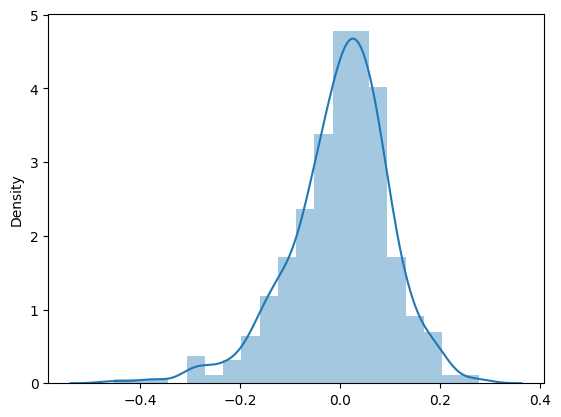

In [110]:
sns.distplot(resd,bins=20)

##Final stage: Make inferences

In [111]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weather_2',
       'weather_3'],
      dtype='object')

In [112]:
df_test.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
184   0        1           0  29.793347  33.27085  63.7917   5.459106  6043   
535   1        0           1  32.082500  36.04875  59.2083   7.625404  6211   
299   0        0           1  19.270000  22.85230  81.2917  13.250121  2659   
221   0        0           1  31.433347  34.24915  42.4167  13.417286  4780   
152   0        0           1  29.315000  32.19710  30.5000  19.583229  4968   

     season_2  season_3  ...  month_11  month_12  weekday_1  weekday_2  \
184         0         1  ...         0         0          1          0   
535         1         0  ...         0         0          0          0   
299         0         0  ...         0         0          0          0   
221         0         1  ...         0         0          0          0   
152         1         0  ...         0         0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weather_2  weather_3  
184          0          0          0          0          1          0  
535          1          0          0          0          0          0  
299          0          1          0          0          1          0  
221          1          0          0          0          0          0  
152          0          1          0          0          0          0  

[5 rows x 30 columns]

In [113]:
# Apply scaler() to all numeric variables in test dataset.
#we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [114]:
# check the values
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           1  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           1  0.817246  0.741471  0.314298   0.537414   

          cnt  season_2  season_3  ...  month_11  month_12  weekday_1  \
184  0.692706         0         1  ...         0         0          1   
535  0.712034         1         0  ...         0         0          0   
299  0.303382         0         0  ...         0         0          0   
221  0.547400         0         1  ...         0         0          0   
152  0.569029         1         0  ...         0         0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weather_2  \
184          0          0          0          0          0          1   
535          0          1          0          0          0          0   
299          0          0          1          0          0          1   
221          0          1          0          0          0          0   
152          0          0          1          0          0          0   

     weather_3  
184          0  
535          0  
299          0  
221          0  
152          0  

[5 rows x 30 columns]

In [115]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.558718    0.532847    0.638221   
std      0.500809    0.187620    0.459303    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt    season_2    season_3  ...    month_11  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.313293    0.522154    0.263636    0.245455  ...    0.072727   
std      0.159584    0.219163    0.441609    0.431338  ...    0.260281   
min     -0.042808    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.198843    0.378595    0.000000    0.000000  ...    0.000000   
50%      0.300126    0.524678    0.000000    0.000000  ...    0.000000   
75%      0.402718    0.677750    1.000000    0.000000  ...    0.000000   
max      0.807474    0.963300    1.000000    1.000000  ...    1.000000   

         month_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.086364    0.127273    0.168182    0.100000    0.163636    0.177273   
std      0.281541    0.334038    0.374881    0.300684    0.370789    0.382770   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6   weather_2   weather_3  
count  220.000000  220.000000  220.000000  
mean     0.118182    0.318182    0.027273  
std      0.323559    0.466833    0.163248  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [116]:
## divide into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [117]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          220 non-null    int64  
 1   holiday     220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   temp        220 non-null    float64
 4   atemp       220 non-null    float64
 5   hum         220 non-null    float64
 6   windspeed   220 non-null    float64
 7   season_2    220 non-null    int64  
 8   season_3    220 non-null    int64  
 9   season_4    220 non-null    int64  
 10  month_2     220 non-null    int64  
 11  month_3     220 non-null    int64  
 12  month_4     220 non-null    int64  
 13  month_5     220 non-null    int64  
 14  month_6     220 non-null    int64  
 15  month_7     220 non-null    int64  
 16  month_8     220 non-null    int64  
 17  month_9     220 non-null    int64  
 18  month_10    220 non-null    int64  
 19  month_11    220 non-null    int6

In [118]:
# get the list of columns from the final training data set X_train_new_7

cols = X_train_new_7.columns
X_test = X_test[cols]


In [119]:
X_test

yr  holiday      temp  windspeed  season_2  season_4  month_9  weather_3
184   0        1  0.831783   0.084219         0         0        0          0
535   1        0  0.901354   0.153728         1         0        0          0
299   0        0  0.511964   0.334206         0         1        0          0
221   0        0  0.881625   0.339570         0         0        0          0
152   0        0  0.817246   0.537414         1         0        0          0
..   ..      ...       ...        ...       ...       ...      ...        ...
702   1        0  0.519232   0.283397         0         1        0          0
127   0        0  0.584649   0.069510         1         0        0          0
640   1        0  0.745598   0.052115         0         1        0          0
72    0        0  0.331557   0.203418         0         0        0          0
653   1        0  0.509887   0.300794         0         1        0          0

[220 rows x 8 columns]

In [120]:
# Adding constant variable to test dataframe
X_test_lm1 = sm.add_constant(X_test)

In [121]:
X_test_lm1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      220 non-null    float64
 1   yr         220 non-null    int64  
 2   holiday    220 non-null    int64  
 3   temp       220 non-null    float64
 4   windspeed  220 non-null    float64
 5   season_2   220 non-null    int64  
 6   season_4   220 non-null    int64  
 7   month_9    220 non-null    int64  
 8   weather_3  220 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 17.2 KB


In [122]:
# predict on the test data set using the last trained model lr7


y_test_pred = lr7.predict(X_test_lm1)

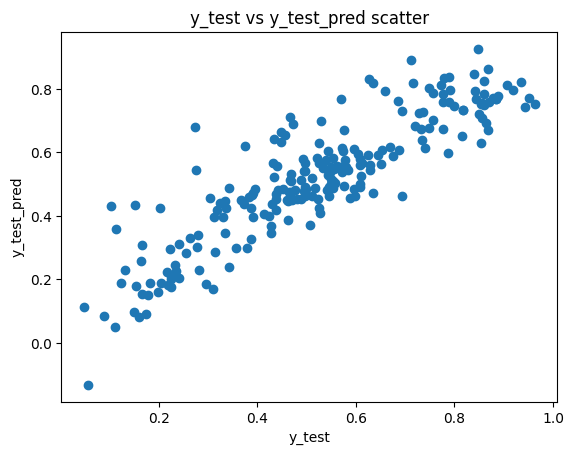

In [125]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.title("y_test vs y_test_pred scatter")
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

## print the R2 score

In [126]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7720731949554797

## ----Conclusion

In [ ]:
## check the train R2 score vs test r2 score

## Train R2 score = 0.80
## Test R2 score = 0.77

##As the test R2 score is within 5% range of train R2 score, the model can be deemed good
## Also, there are no high VIF fields in training data set, and no high p values.
## Indicates that the model is significant now